In [1]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test_full0.5')
settings.replicates = 5
settings.gamma_range = (2,10)
settings.train_frac = 0.5
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV


In [2]:
print(os.environ["HDXER_PATH"])
print(__name__)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer
__main__


In [3]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer


In [4]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"



In [5]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [6]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for Experimental
AVG: ncol = 6, len(names) = 4


In [7]:
print(VDX.rates)

Empty DataFrame
Columns: []
Index: []


In [8]:
print(VDX.paths)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   

   experimental                                          int_rates  
0         False                                                NaN  
1         False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  


In [9]:
sim_name = 'BPTI_MD'

sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

os.listdir(sim_dir)

md_reps = 1
rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

top_name = "bpti_5pti_eq6_protonly.gro"

top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

traj_name = "bpti_5pti_reimg_protonly.xtc"

traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

print(top_path)
print(traj_paths)


VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']
                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   

  experimental                                          int_rates  \
0        False                                                NaN   
1 

In [10]:
print((traj_paths))

['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']


In [11]:
VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   
3                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                      

In [12]:
VDX.paths

HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   
3                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                                                 top  \
0                                                NaN   
1                                                NaN   
2  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
3  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   

                                                traj  
0                                                NaN  
1                                                NaN  
2  [/Users/alexi/Library/CloudStorage/OneDrive-Ne...  
3  [/Users/alexi/Library/CloudStorage/OneDrive-Ne...

Saved train MD_Simulated segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 0  4  6  8  9 12 13 15 16 17 19 24 25 26 29 32 34 35 39 40]
Saved val MD_Simulated segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_1/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 1  2  3  5  7 10 11 14 18 20 21 22 23 27 28 30 31 33 36 37 38]
    ResStr  ResEnd    0.167      1.0     10.0    120.0  peptide  \
0       34      35  0.00109  0.00649  0.06306  0.54232       24   
1       22      23  0.00000  0.00000  0.00003  0.00037       13   
2       17      18  0.00028  0.00165  0.01638  0.17975        8   
3       35      36  0.01528  0.08809  0.60233  0.99998       25   
4       11      12  0.99880  1.00000  1.00000  1.00000        4   
5       55     

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/Va

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

/Users/alexi/Library/CloudStorage/OneDrive-Nexu

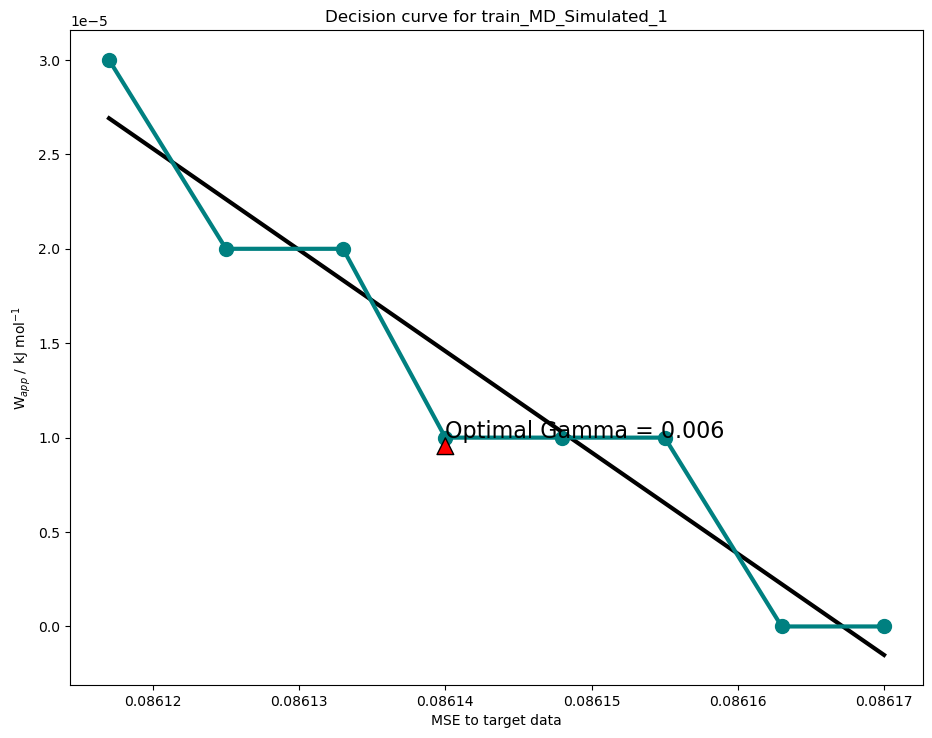

Optimal gamma for train_MD_Simulated_1 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_1/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00011  0.00064  0.00643  0.07447        0
1  0.00009  0.00054  0.00537  0.06260        1
2  0.00657  0.03868  0.32598  0.99121        2
3  0.00005  0.00029  0.00286  0.03378        3
4  0.97171  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00011  0.00064  0.00643  0.07447        0
1   0.00009  0.00054  0.00537  0.06260        1
2   0.00657  0.03868  0.32598  0.99121        2
3   0.00005  0.00029  0.00286  0.03378        3
4   0.97171  1.00000  1.00000  1.00000        4
5   0.01605  0.09234  0.62049  0.99999        5
6   0.06319  0.32353  0.97993  1.00000        6
7   0.00684  0.04026  0.33696  0.99278        7
8   1.00000 

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_1/val_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_1/out__val_MD_Simulated_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rota

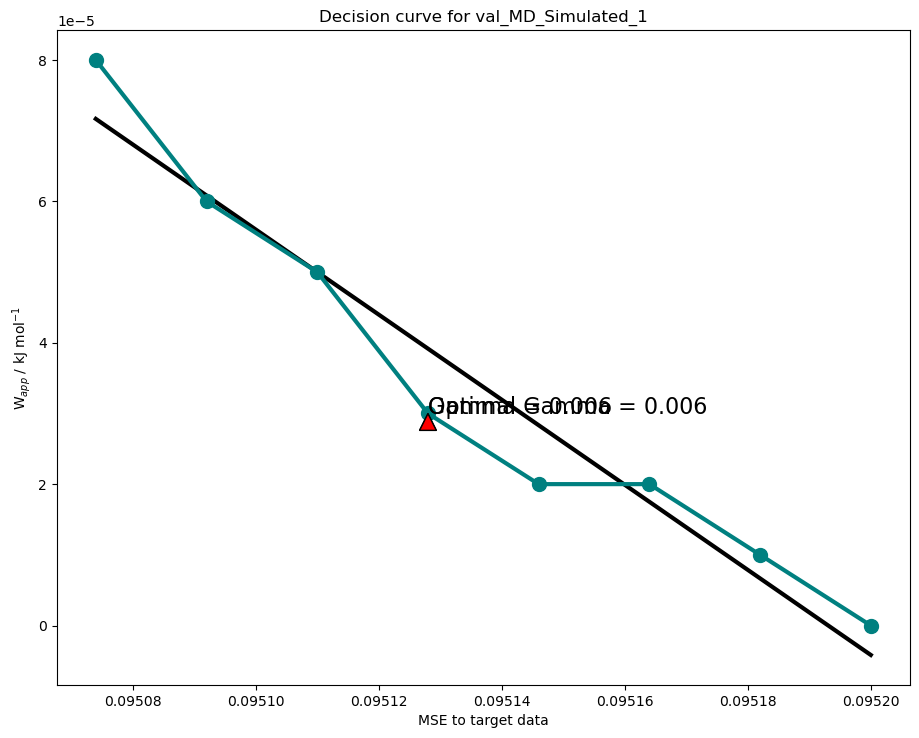

Optimal gamma for val_MD_Simulated_1 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_1/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(21, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.01232  0.07155  0.52402  0.99986        0
1  0.27033  0.84851  1.00000  1.00000        1
2  0.29658  0.87835  1.00000  1.00000        2
3  0.78049  0.99989  1.00000  1.00000        3
4  0.33292  0.91145  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.01232  0.07155  0.52402  0.99986        0
1   0.27033  0.84851  1.00000  1.00000        1
2   0.29658  0.87835  1.00000  1.00000        2
3   0.78049  0.99989  1.00000  1.00000        3
4   0.33292  0.91145  1.00000  1.00000        4
5   0.00029  0.00176  0.01743  0.19025        5
6   0.00002  0.00010  0.00101  0.01202        6
7   0.00202  0.01201  0.11380  0.76538        7
8   0.00231  0.0

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexu

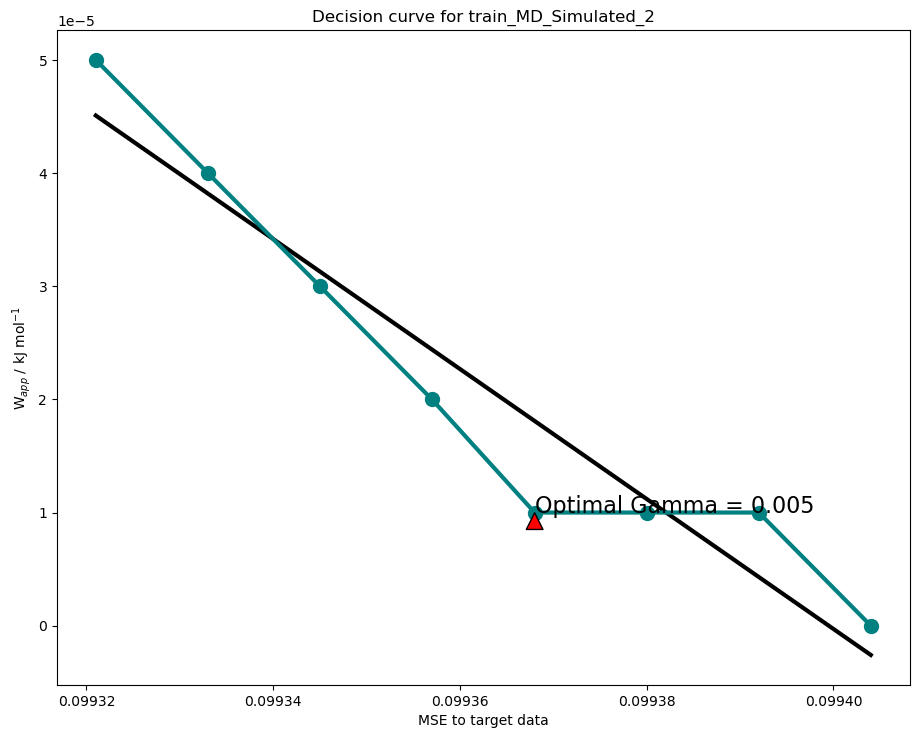

Optimal gamma for train_MD_Simulated_2 is 5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_2/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00202  0.01201  0.11382  0.76544        0
1  0.78044  0.99989  1.00000  1.00000        1
2  0.00141  0.00843  0.08114  0.63776        2
3  0.00947  0.05536  0.43418  0.99892        3
4  0.98783  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00202  0.01201  0.11382  0.76544        0
1   0.78044  0.99989  1.00000  1.00000        1
2   0.00141  0.00843  0.08114  0.63776        2
3   0.00947  0.05536  0.43418  0.99892        3
4   0.98783  1.00000  1.00000  1.00000        4
5   0.00011  0.00064  0.00643  0.07447        5
6   0.33276  0.91133  1.00000  1.00000        6
7   1.00000  1.00000  1.00000  1.00000        7
8   0.00084 

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_2/val_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_2/out__val_MD_Simulated_2Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rota

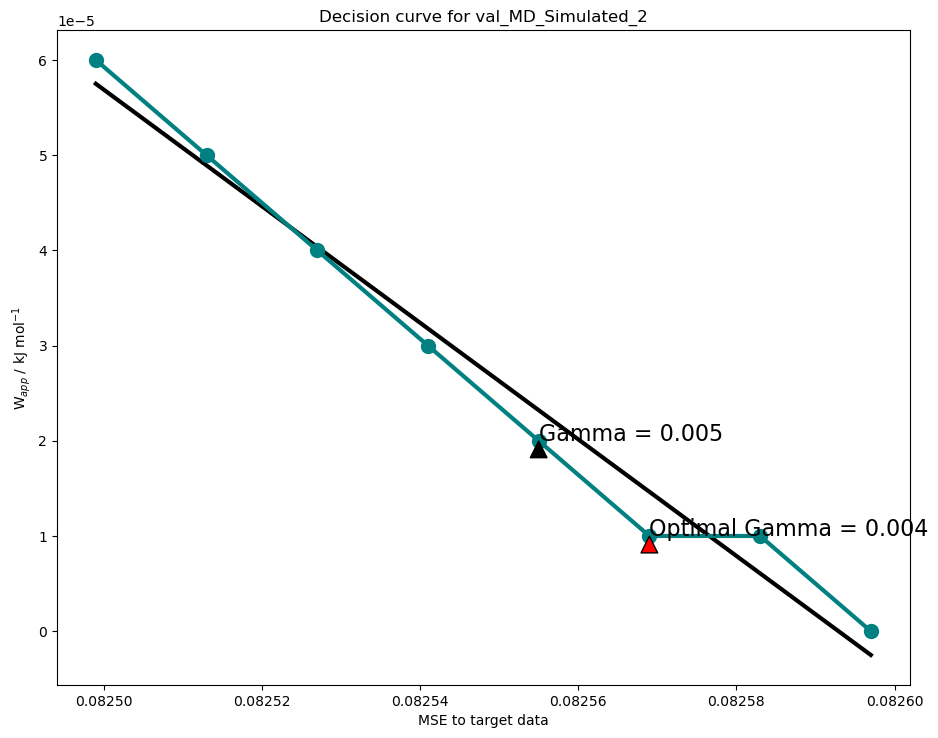

Optimal gamma for val_MD_Simulated_2 is 4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_2/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(21, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.14345  0.60434  0.99991  1.00000        0
1  0.01232  0.07157  0.52411  0.99987        1
2  0.27050  0.84871  1.00000  1.00000        2
3  0.29661  0.87838  1.00000  1.00000        3
4  0.97175  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.14345  0.60434  0.99991  1.00000        0
1   0.01232  0.07157  0.52411  0.99987        1
2   0.27050  0.84871  1.00000  1.00000        2
3   0.29661  0.87838  1.00000  1.00000        3
4   0.97175  1.00000  1.00000  1.00000        4
5   0.00002  0.00010  0.00101  0.01202        5
6   0.61027  0.99646  1.00000  1.00000        6
7   0.99121  1.00000  1.00000  1.00000        7
8   0.02571  0.1

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_3/train_MD_Simulated_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_3/out__train_MD_Simulated_3Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexu

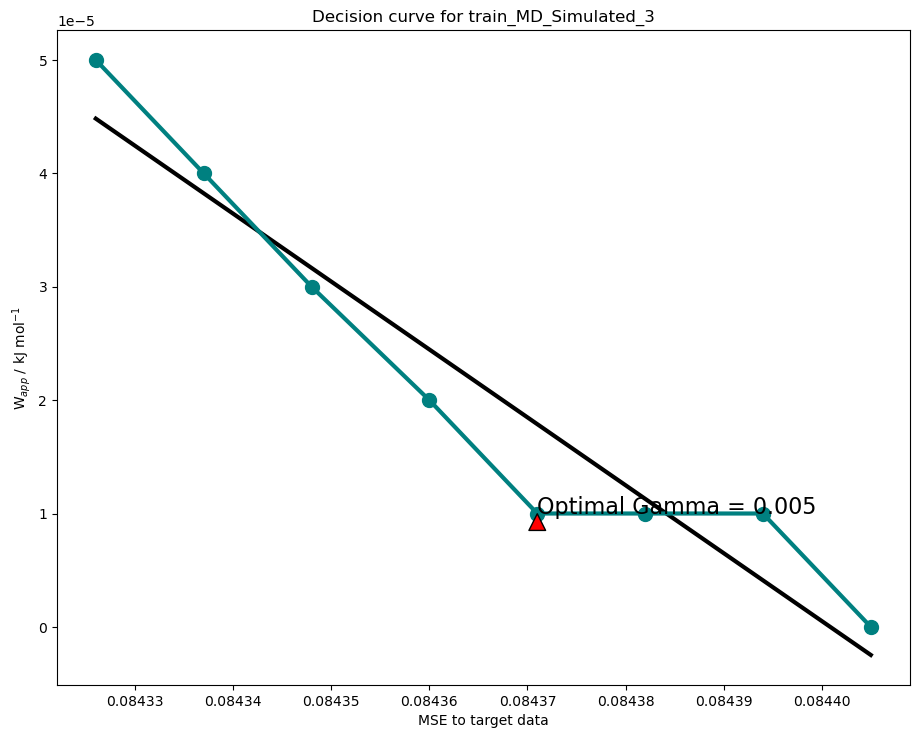

Optimal gamma for train_MD_Simulated_3 is 5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_3/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.12147  0.53952  0.99957  1.00000        0
1  0.78045  0.99989  1.00000  1.00000        1
2  0.00002  0.00010  0.00101  0.01202        2
3  0.61002  0.99644  1.00000  1.00000        3
4  0.00419  0.02484  0.22238  0.95111        4
      0.167      1.0     10.0    120.0  peptide
0   0.12147  0.53952  0.99957  1.00000        0
1   0.78045  0.99989  1.00000  1.00000        1
2   0.00002  0.00010  0.00101  0.01202        2
3   0.61002  0.99644  1.00000  1.00000        3
4   0.00419  0.02484  0.22238  0.95111        4
5   0.00000  0.00000  0.00005  0.00058        5
6   0.99121  1.00000  1.00000  1.00000        6
7   0.31374  0.89507  1.00000  1.00000        7
8   0.00232 

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_3/val_MD_Simulated_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_3/out__val_MD_Simulated_3Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rota

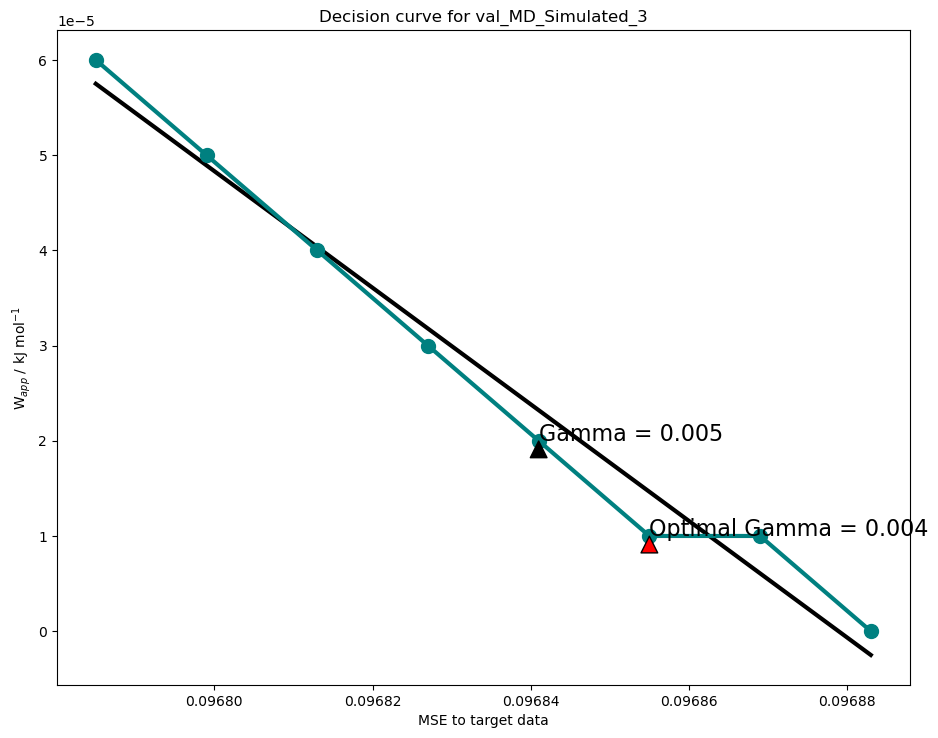

Optimal gamma for val_MD_Simulated_3 is 4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_3/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(21, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.01232  0.07155  0.52404  0.99986        0
1  0.29660  0.87837  1.00000  1.00000        1
2  0.97171  1.00000  1.00000  1.00000        2
3  0.98783  1.00000  1.00000  1.00000        3
4  0.33283  0.91138  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.01232  0.07155  0.52404  0.99986        0
1   0.29660  0.87837  1.00000  1.00000        1
2   0.97171  1.00000  1.00000  1.00000        2
3   0.98783  1.00000  1.00000  1.00000        3
4   0.33283  0.91138  1.00000  1.00000        4
5   0.00009  0.00054  0.00537  0.06258        5
6   0.00202  0.01201  0.11384  0.76549        6
7   0.00141  0.00843  0.08113  0.63771        7
8   0.07669  0.3

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_4/train_MD_Simulated_4_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_4/out__train_MD_Simulated_4Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexu

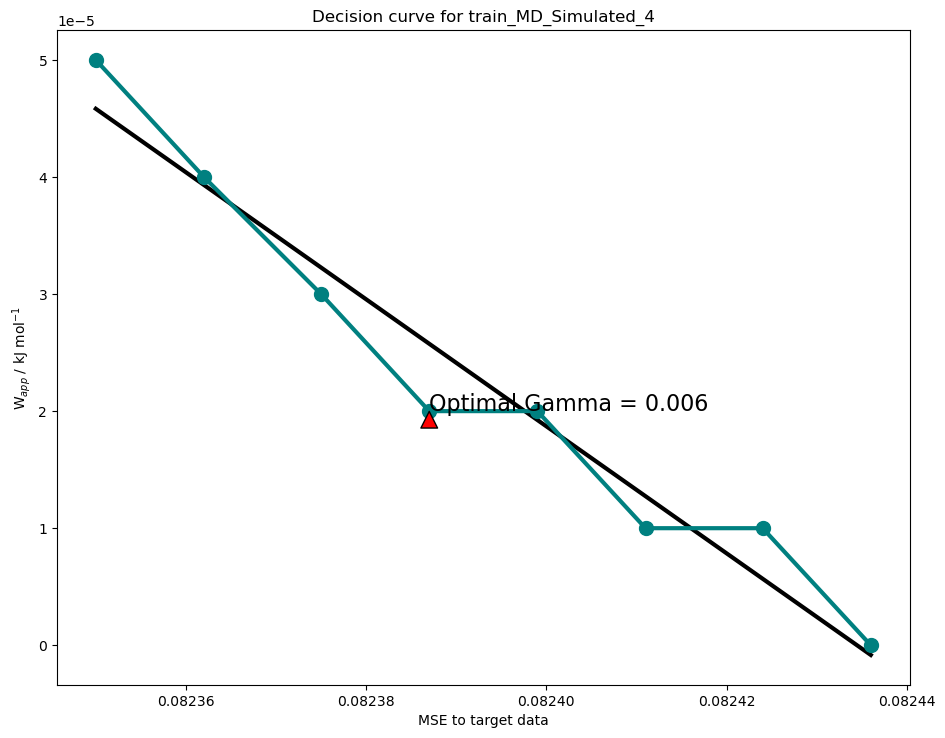

Optimal gamma for train_MD_Simulated_4 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_4/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.78043  0.99989  1.00000  1.00000        0
1  0.00009  0.00054  0.00537  0.06259        1
2  0.33285  0.91139  1.00000  1.00000        2
3  0.14342  0.60426  0.99991  1.00000        3
4  0.16082  0.65003  0.99997  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.78043  0.99989  1.00000  1.00000        0
1   0.00009  0.00054  0.00537  0.06259        1
2   0.33285  0.91139  1.00000  1.00000        2
3   0.14342  0.60426  0.99991  1.00000        3
4   0.16082  0.65003  0.99997  1.00000        4
5   0.00947  0.05536  0.43419  0.99892        5
6   0.19097  0.71887  1.00000  1.00000        6
7   0.00141  0.00843  0.08113  0.63773        7
8   0.20215 

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_4/val_MD_Simulated_4_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_4/out__val_MD_Simulated_4Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rota

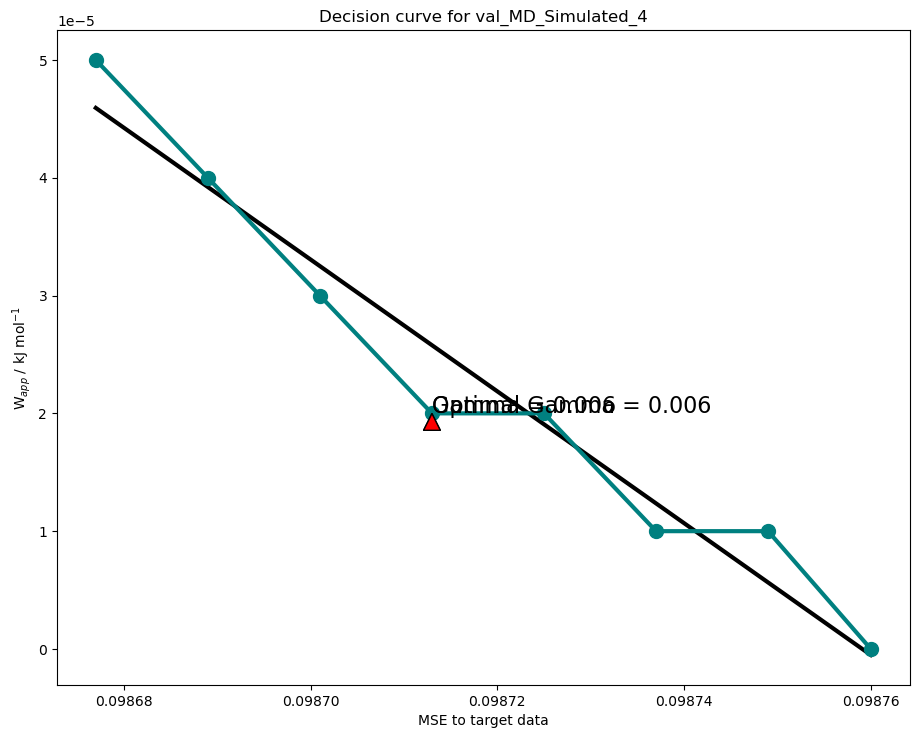

Optimal gamma for val_MD_Simulated_4 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_4/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(21, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.01232  0.07157  0.52413  0.99987        0
1  0.27037  0.84856  1.00000  1.00000        1
2  0.29656  0.87833  1.00000  1.00000        2
3  0.97176  1.00000  1.00000  1.00000        3
4  0.00657  0.03868  0.32599  0.99121        4
      0.167      1.0     10.0    120.0  peptide
0   0.01232  0.07157  0.52413  0.99987        0
1   0.27037  0.84856  1.00000  1.00000        1
2   0.29656  0.87833  1.00000  1.00000        2
3   0.97176  1.00000  1.00000  1.00000        3
4   0.00657  0.03868  0.32599  0.99121        4
5   0.00002  0.00010  0.00101  0.01201        5
6   0.00000  0.00000  0.00005  0.00058        6
7   0.00202  0.01202  0.11386  0.76556        7
8   0.61011  0.9

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_5/train_MD_Simulated_5_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_5/out__train_MD_Simulated_5Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexu

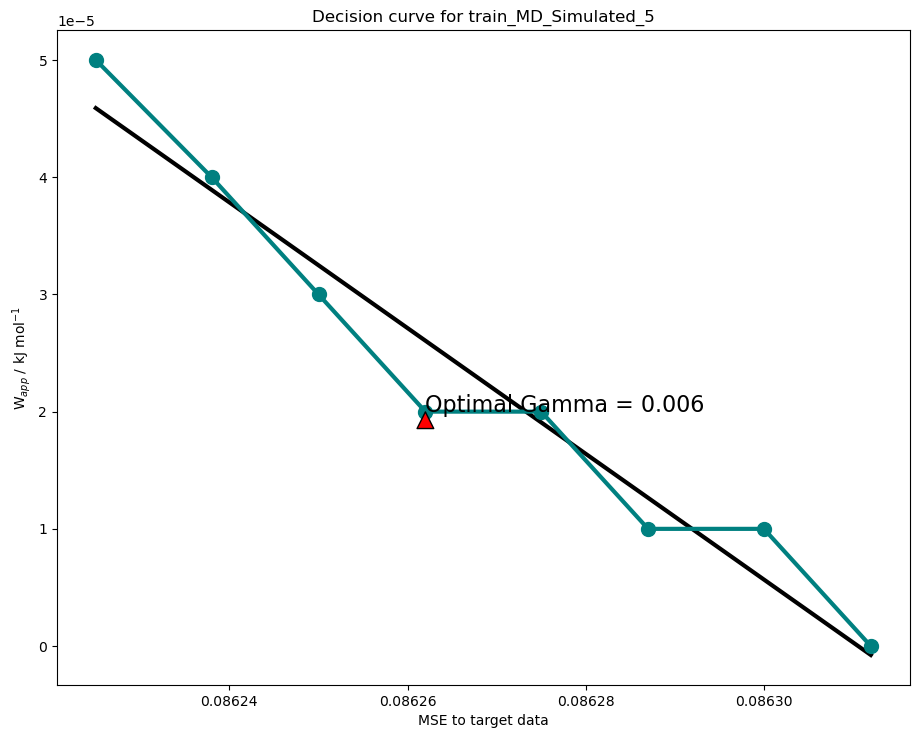

Optimal gamma for train_MD_Simulated_5 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/train_MD_Simulated_5/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.29658  0.87835  1.00000  1.00000        0
1  0.00684  0.04024  0.33685  0.99277        1
2  0.98782  1.00000  1.00000  1.00000        2
3  0.97170  1.00000  1.00000  1.00000        3
4  0.02571  0.14441  0.78979  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.29658  0.87835  1.00000  1.00000        0
1   0.00684  0.04024  0.33685  0.99277        1
2   0.98782  1.00000  1.00000  1.00000        2
3   0.97170  1.00000  1.00000  1.00000        3
4   0.02571  0.14441  0.78979  1.00000        4
5   0.00029  0.00176  0.01743  0.19026        5
6   0.19097  0.71888  1.00000  1.00000        6
7   0.01605  0.09231  0.62038  0.99999        7
8   0.33286 

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_5/val_MD_Simulated_5_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_5/out__val_MD_Simulated_5Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rota

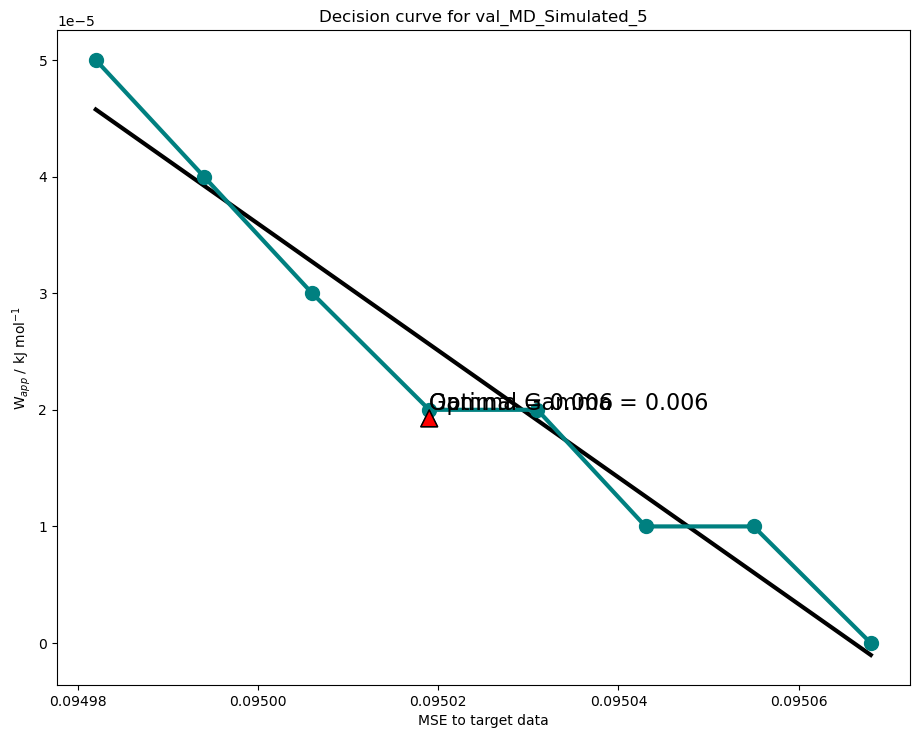

Optimal gamma for val_MD_Simulated_5 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5/val_MD_Simulated_5/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(21, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.14340  0.60421  0.99991  1.00000        0
1  0.27033  0.84850  1.00000  1.00000        1
2  0.78047  0.99989  1.00000  1.00000        2
3  0.00657  0.03868  0.32597  0.99121        3
4  0.00002  0.00010  0.00101  0.01202        4
      0.167      1.0     10.0    120.0  peptide
0   0.14340  0.60421  0.99991  1.00000        0
1   0.27033  0.84850  1.00000  1.00000        1
2   0.78047  0.99989  1.00000  1.00000        2
3   0.00657  0.03868  0.32597  0.99121        3
4   0.00002  0.00010  0.00101  0.01202        4
5   0.61000  0.99644  1.00000  1.00000        5
6   0.99121  1.00000  1.00000  1.00000        6
7   0.00232  0.01379  0.12964  0.81104        7
8   0.06318  0.3

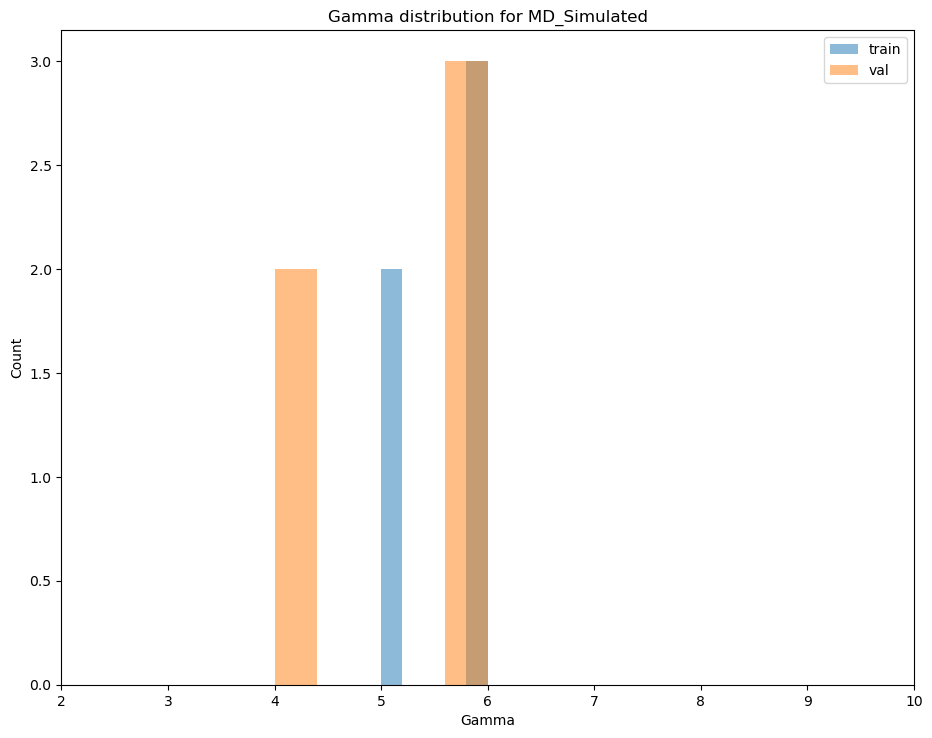

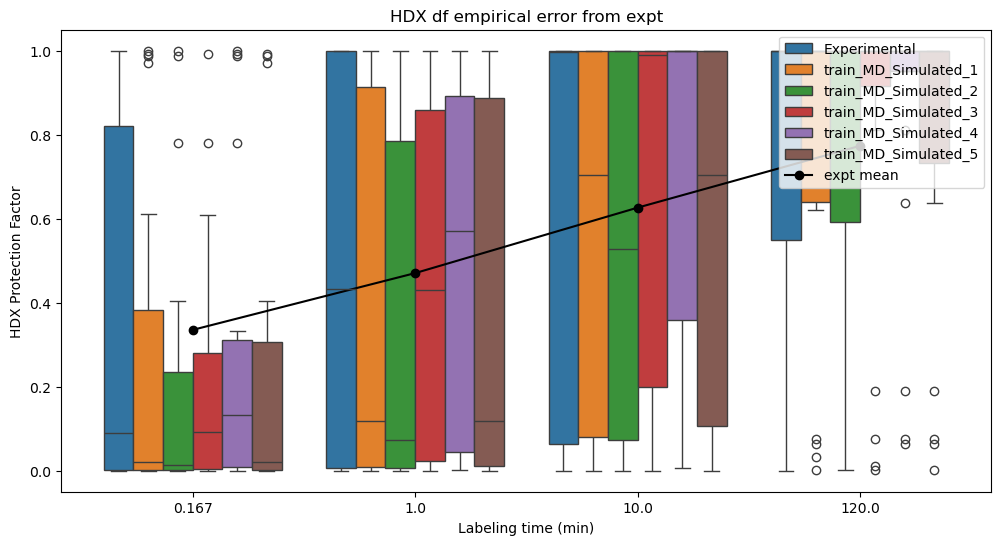

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12154  0.53974  0.99957  1.00000       16  val_MD_Simulated_5
242  0.30556  0.88736  1.00000  1.00000       17  val_MD_Simulated_5
243  0.00144  0.00859  0.08267  0.64493       18  val_MD_Simulated_5
244  0.00419  0.02484  0.22240  0.95113       19  val_MD_Simulated_5
245  0.16087  0.65015  0.99997  1.00000       20  val_MD_Simulated_5

[246 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

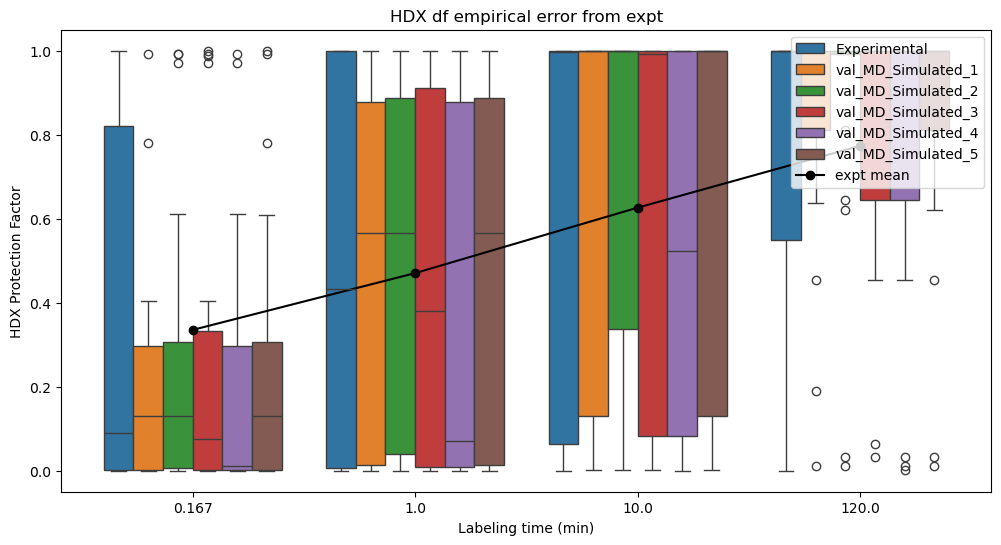

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40]
val_rep_peptides [0, 1, 2, 3, 4, 11, 15, 16, 17, 18, 21, 23, 25, 27, 28, 30, 32, 33, 34, 35, 39]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24]
val_rep_peptides [1, 3, 4, 6, 7, 13, 14, 20, 21, 22, 23, 25, 29, 30, 31, 32, 35, 37, 38, 39, 40]
train_rep_peptides [5, 13, 7, 0, 38, 26, 9, 20, 37, 40, 18, 19, 10, 24, 33, 16, 29, 34, 6, 17]
val_rep_peptides [1, 2, 3, 4, 8, 11, 12, 14, 15, 21, 22, 23, 25, 27

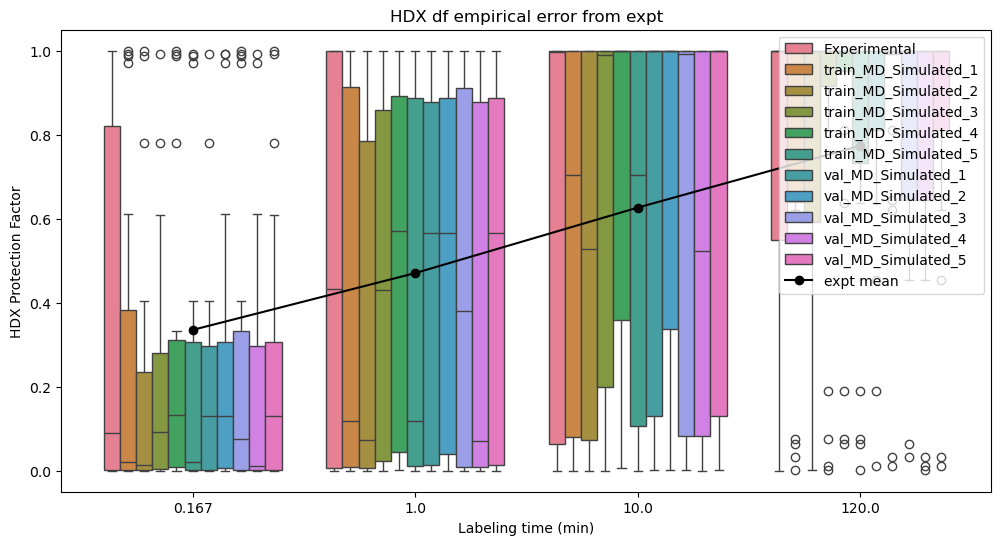

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12154  0.53974  0.99957  1.00000       33  val_MD_Simulated_5
242  0.30556  0.88736  1.00000  1.00000       34  val_MD_Simulated_5
243  0.00144  0.00859  0.08267  0.64493       35  val_MD_Simulated_5
244  0.00419  0.02484  0.22240  0.95113       36  val_MD_Simulated_5
245  0.16087  0.65015  0.99997  1.00000       38  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

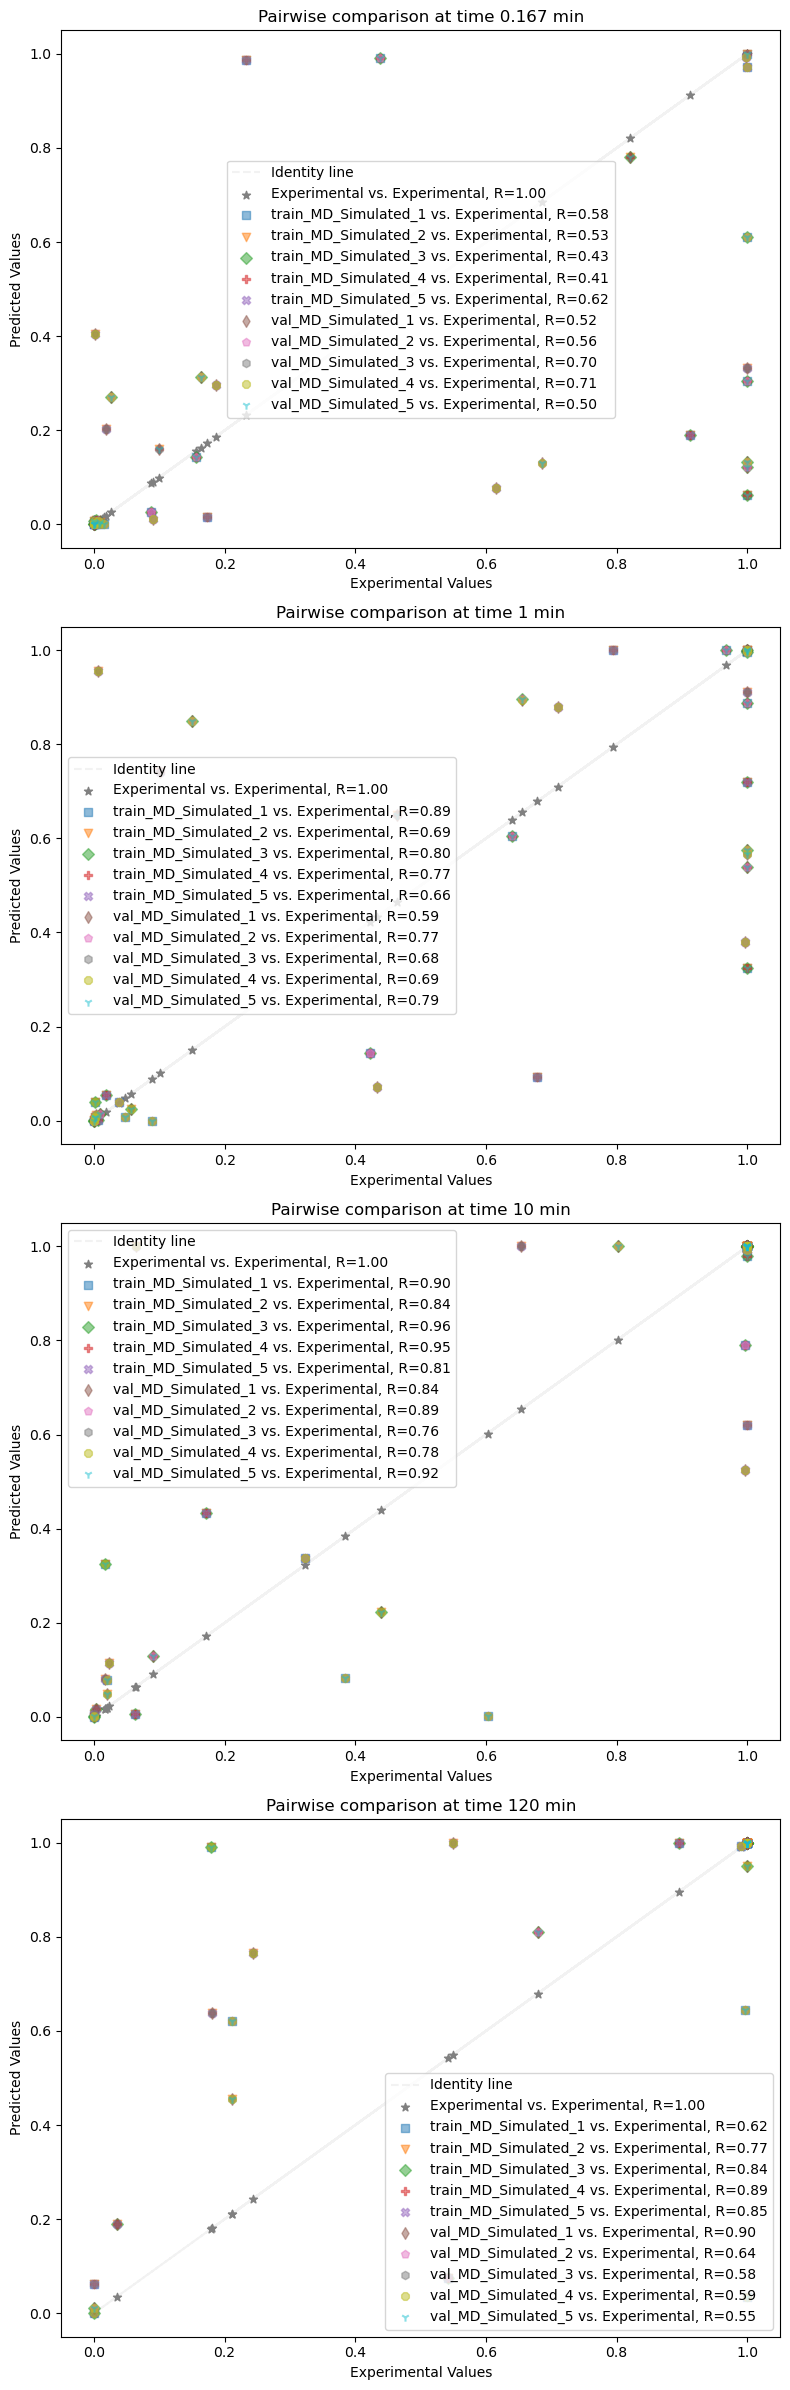

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12154  0.53974  0.99957  1.00000       33  val_MD_Simulated_5
242  0.30556  0.88736  1.00000  1.00000       34  val_MD_Simulated_5
243  0.00144  0.00859  0.08267  0.64493       35  val_MD_Simulated_5
244  0.00419  0.02484  0.22240  0.95113       36  val_MD_Simulated_5
245  0.16087  0.65015  0.99997  1.00000       38  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1183: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1202: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"Time": t, "Type": "Train", "R": train

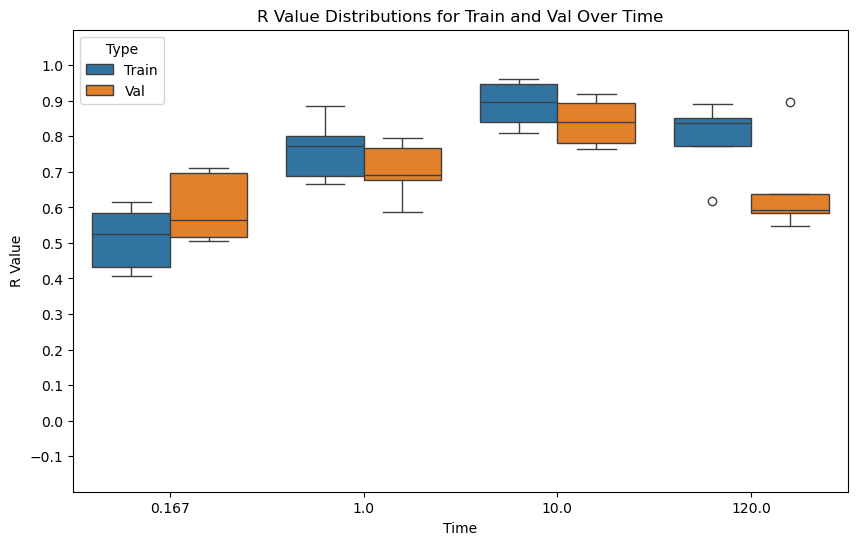

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00643  0.07447       24  train_MD_Simulated_1
1    0.00009  0.00054  0.00537  0.06260       13  train_MD_Simulated_1
2    0.00657  0.03868  0.32598  0.99121        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00286  0.03378       25  train_MD_Simulated_1
4    0.97171  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
405  0.12154  0.53974  0.99957  1.00000       33    val_MD_Simulated_5
406  0.30556  0.88736  1.00000  1.00000       34    val_MD_Simulated_5
407  0.00144  0.00859  0.08267  0.64493       35    val_MD_Simulated_5
408  0.00419  0.02484  0.22240  0.95113       36    val_MD_Simulated_5
409  0.16087  0.65015  0.99997  1.00000       38    val_MD_Simulated_5

[410 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.0064

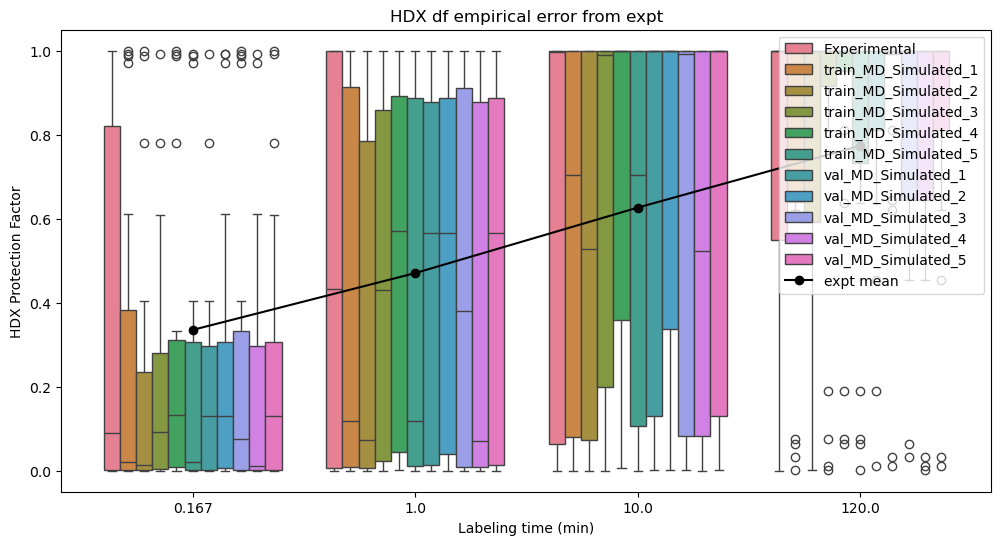

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00643  0.07447       24  train_MD_Simulated_1
1    0.00009  0.00054  0.00537  0.06260       13  train_MD_Simulated_1
2    0.00657  0.03868  0.32598  0.99121        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00286  0.03378       25  train_MD_Simulated_1
4    0.97171  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904       36          Experimental
447  0.01757  0.10068  0.65396  1.00000       37          Experimental
448  0.09888  0.46390  0.99804  1.00000       38          Experimental
449  0.00650  0.03831  0.32339  0.99079       39          Experimental
450  0.17259  0.67841  0.99999  1.00000       40          Experimental

[451 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

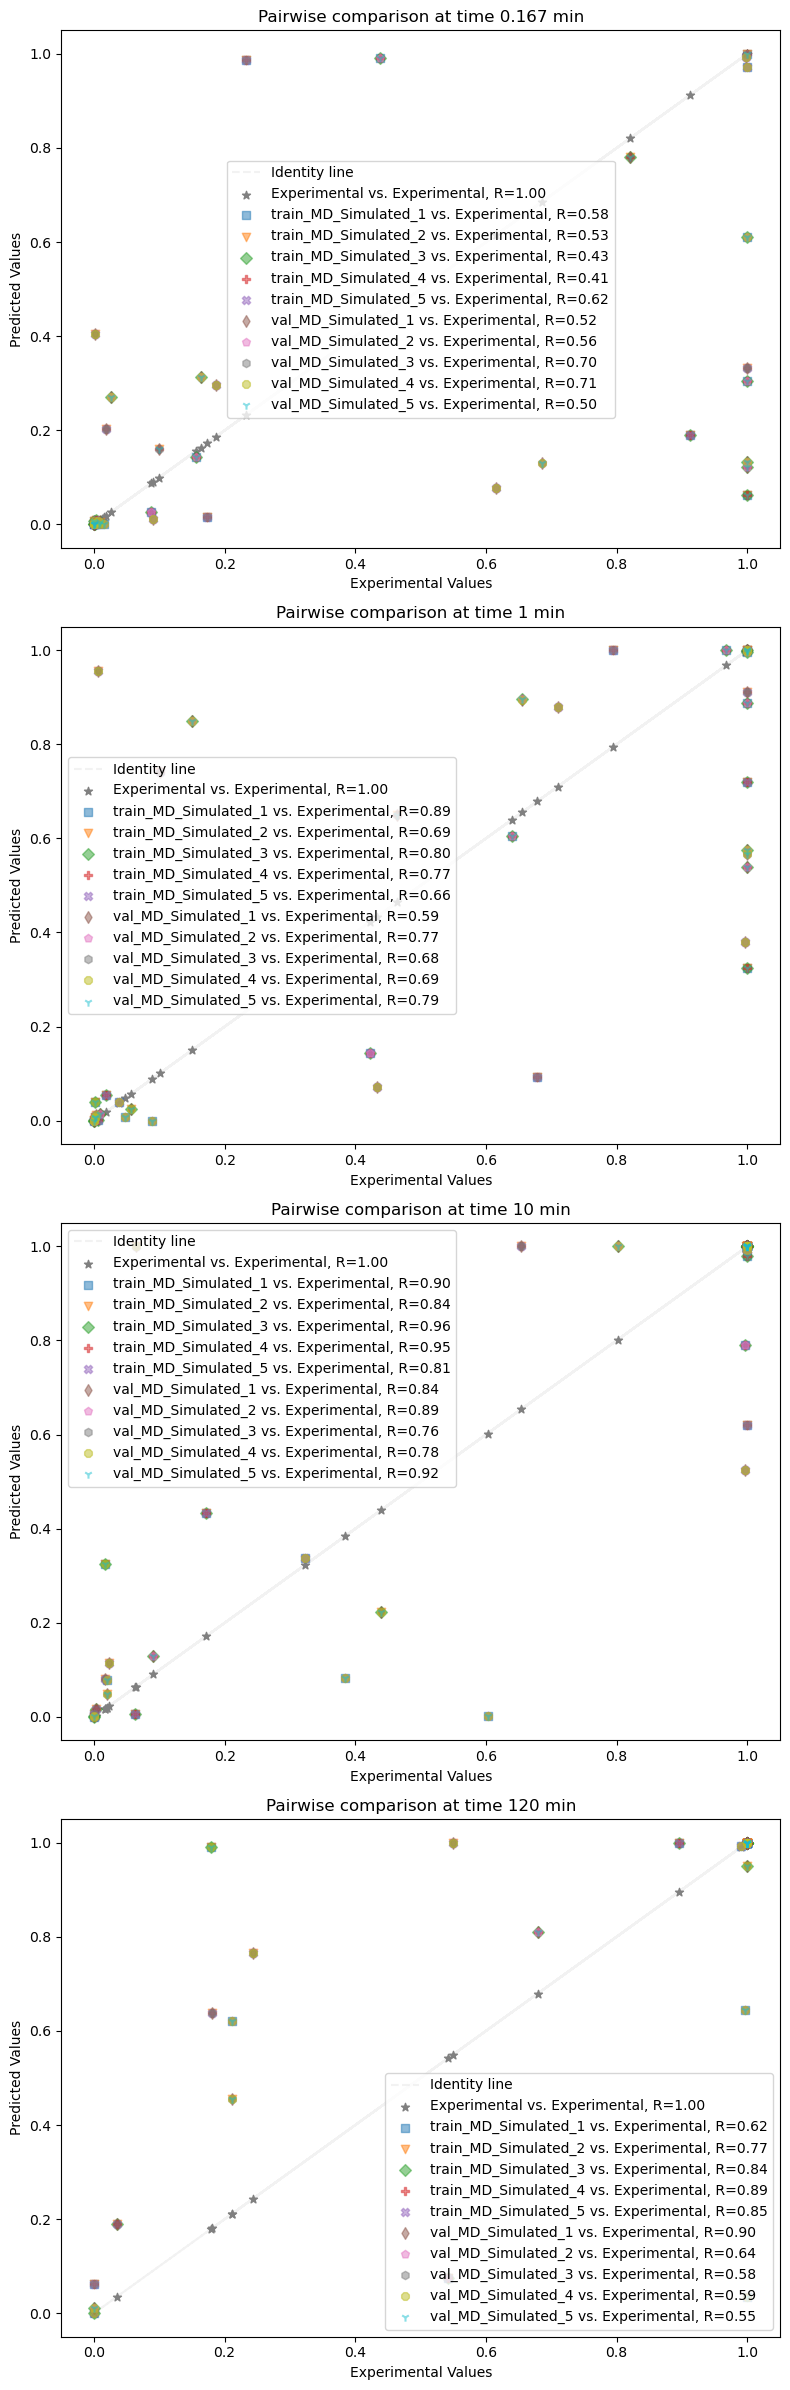

Train coverage: 97.56
Val coverage: 92.68
plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
215  0.98783  1.00000  1.00000    1.0        6  val_MD_Simulated_avg
216  0.99121  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
217  0.99304  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
218  0.99305  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
219  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[220 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.

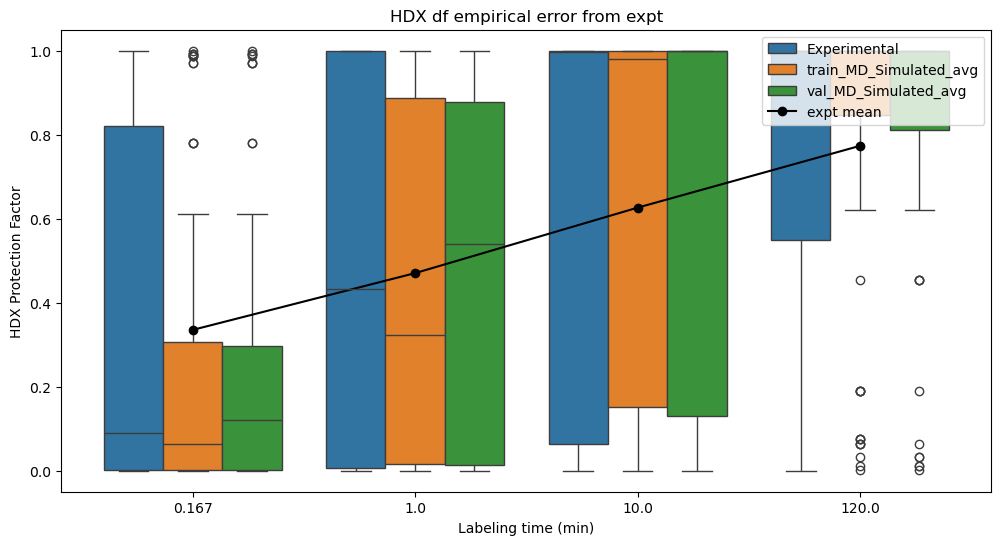

plotting paired errors
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
215  0.98783  1.00000  1.00000    1.0        6  val_MD_Simulated_avg
216  0.99121  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
217  0.99304  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
218  0.99305  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
219  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[220 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

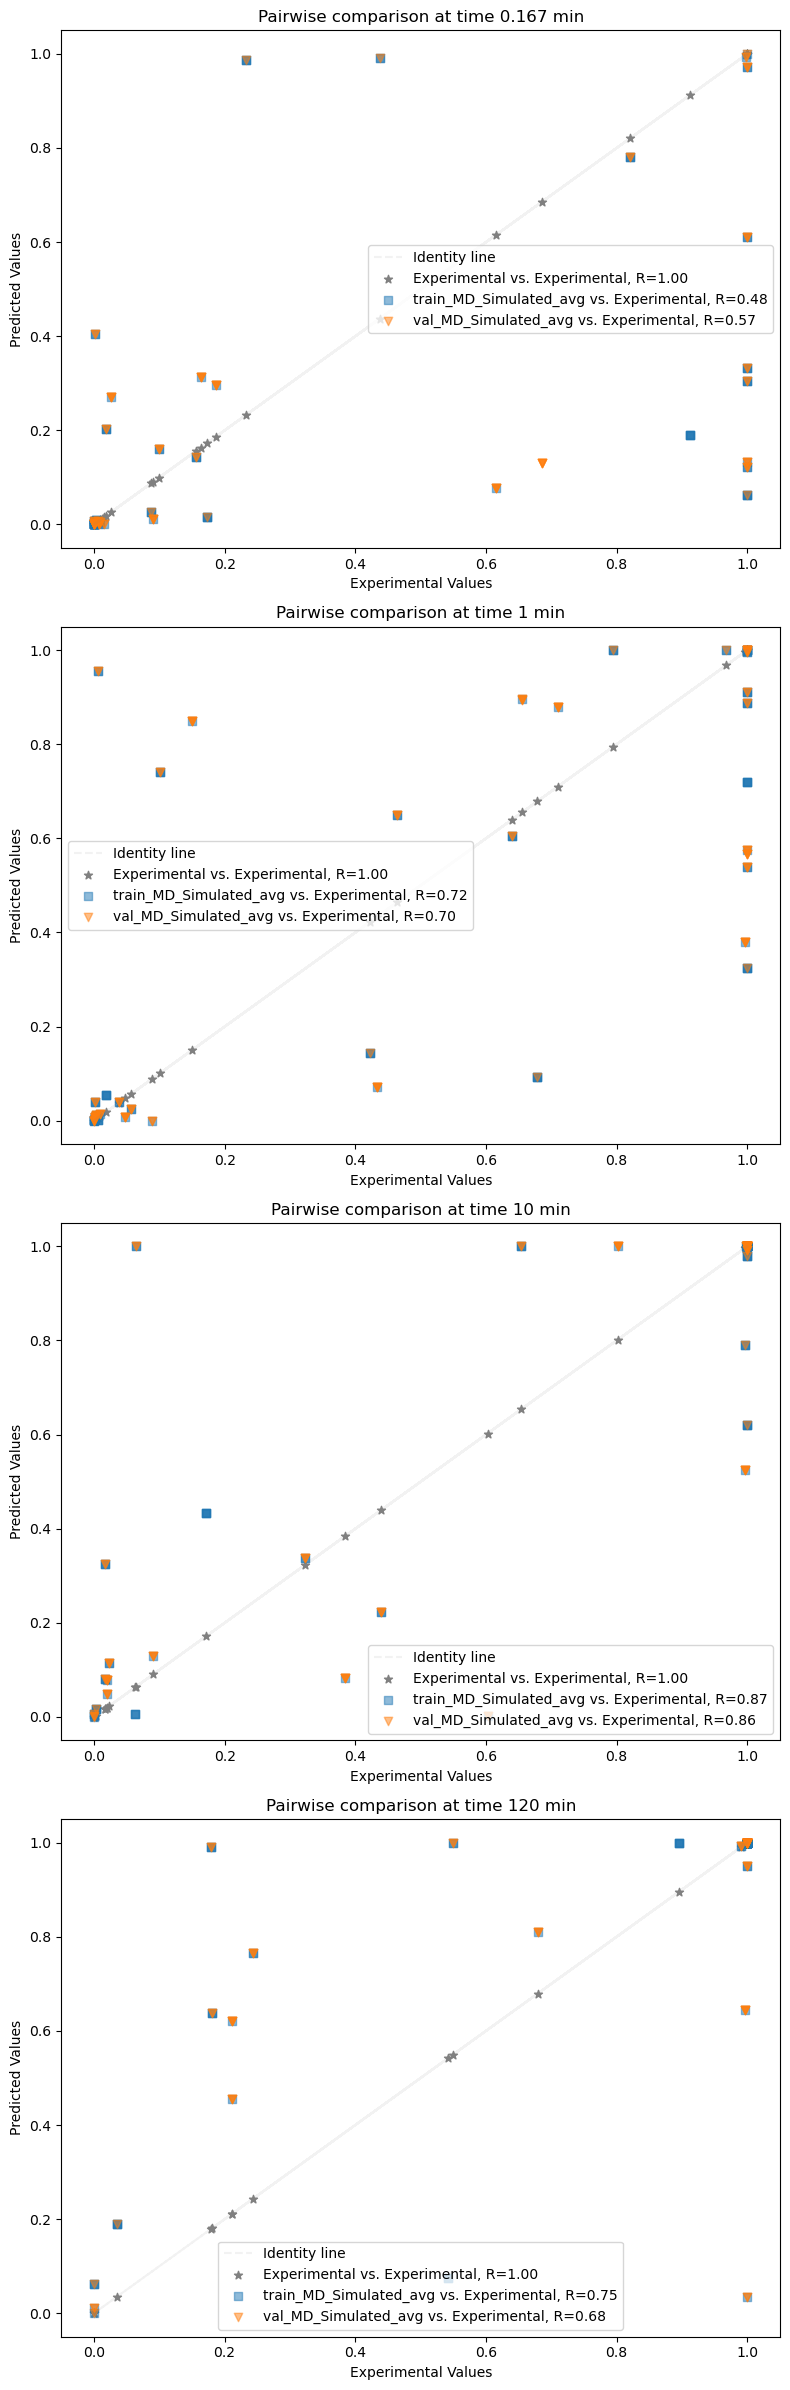

In [13]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [14]:
# VDX.save_experiment()

# dump = train_dfs, val_dfs, train_gammas, val_gammas

# import pickle
# with open('test_dump_full.pickle', 'wb') as f:
#     pickle.dump(dump, f)

In [15]:
# VDX = VDX.load_experiment(load_path='logs/test_full_1701785032.pkl')

In [16]:
# break

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12154  0.53974  0.99957  1.00000       16  val_MD_Simulated_5
242  0.30556  0.88736  1.00000  1.00000       17  val_MD_Simulated_5
243  0.00144  0.00859  0.08267  0.64493       18  val_MD_Simulated_5
244  0.00419  0.02484  0.22240  0.95113       19  val_MD_S

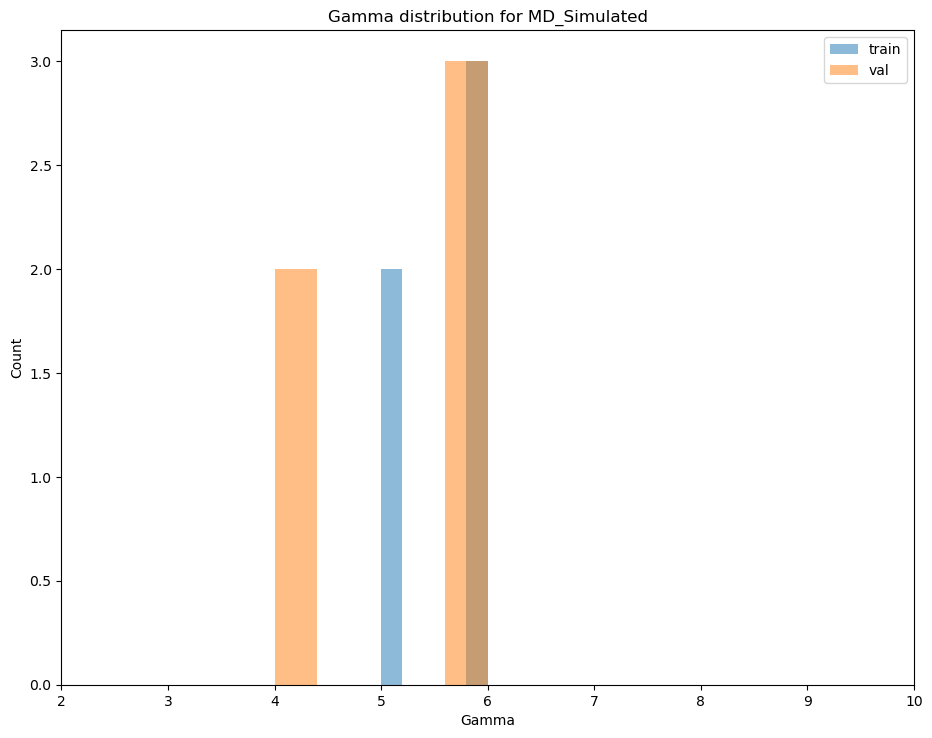

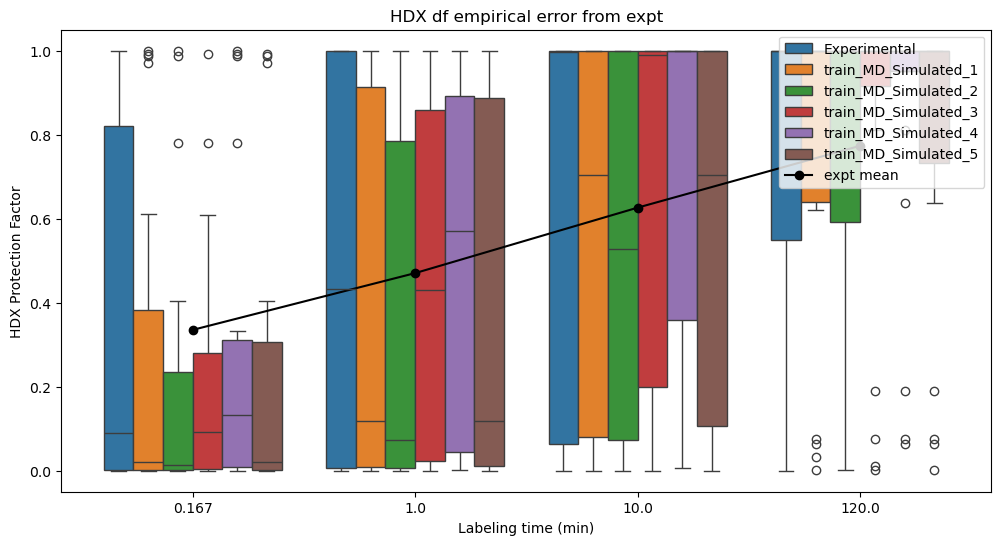

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12154  0.53974  0.99957  1.00000       16  val_MD_Simulated_5
242  0.30556  0.88736  1.00000  1.00000       17  val_MD_Simulated_5
243  0.00144  0.00859  0.08267  0.64493       18  val_MD_Simulated_5
244  0.00419  0.02484  0.22240  0.95113       19  val_MD_Simulated_5
245  0.16087  0.65015  0.99997  1.00000       20  val_MD_Simulated_5

[246 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

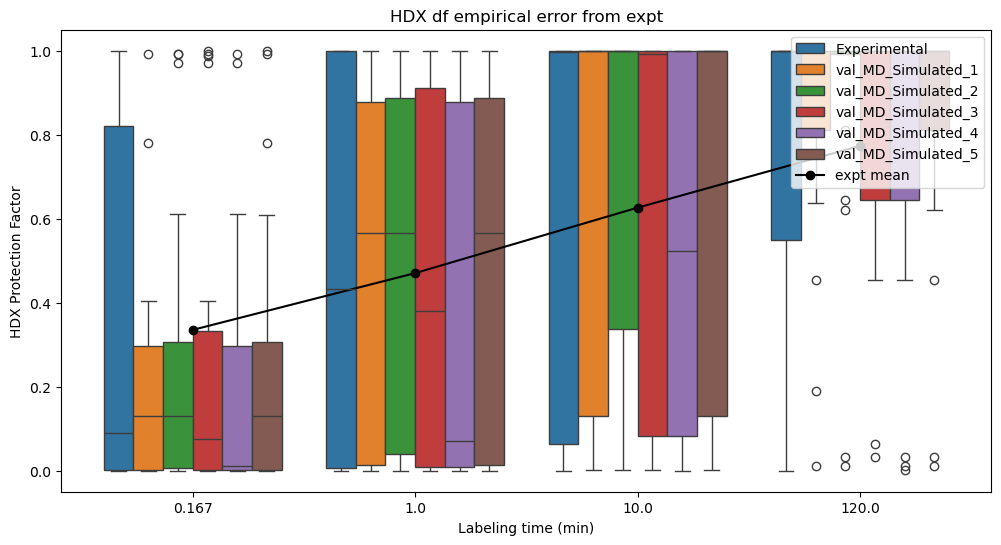

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40]
val_rep_peptides [0, 1, 2, 3, 4, 11, 15, 16, 17, 18, 21, 23, 25, 27, 28, 30, 32, 33, 34, 35, 39]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24]
val_rep_peptides [1, 3, 4, 6, 7, 13, 14, 20, 21, 22, 23, 25, 29, 30, 31, 32, 35, 37, 38, 39, 40]
train_rep_peptides [5, 13, 7, 0, 38, 26, 9, 20, 37, 40, 18, 19, 10, 24, 33, 16, 29, 34, 6, 17]
val_rep_peptides [1, 2, 3, 4, 8, 11, 12, 14, 15, 21, 22, 23, 25, 27

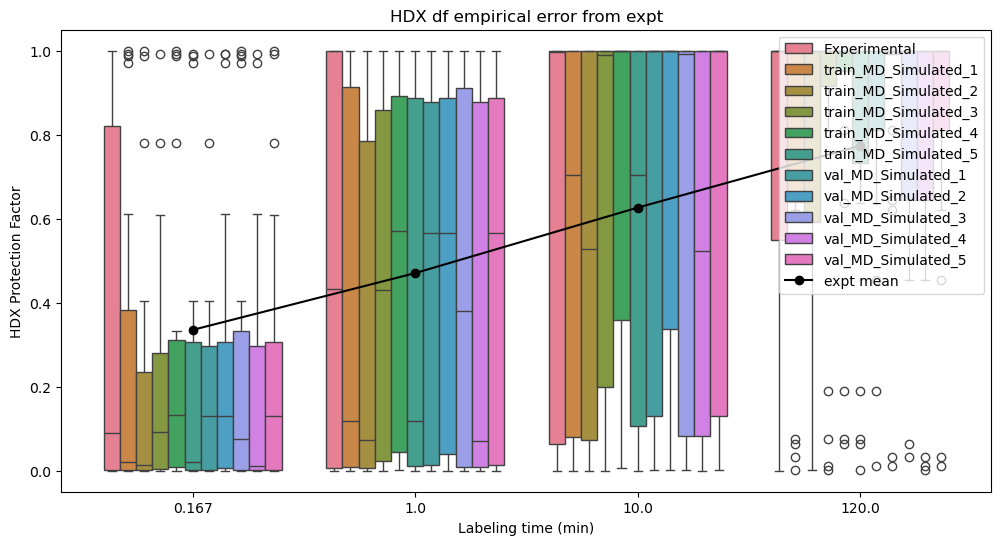

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12154  0.53974  0.99957  1.00000       33  val_MD_Simulated_5
242  0.30556  0.88736  1.00000  1.00000       34  val_MD_Simulated_5
243  0.00144  0.00859  0.08267  0.64493       35  val_MD_Simulated_5
244  0.00419  0.02484  0.22240  0.95113       36  val_MD_Simulated_5
245  0.16087  0.65015  0.99997  1.00000       38  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

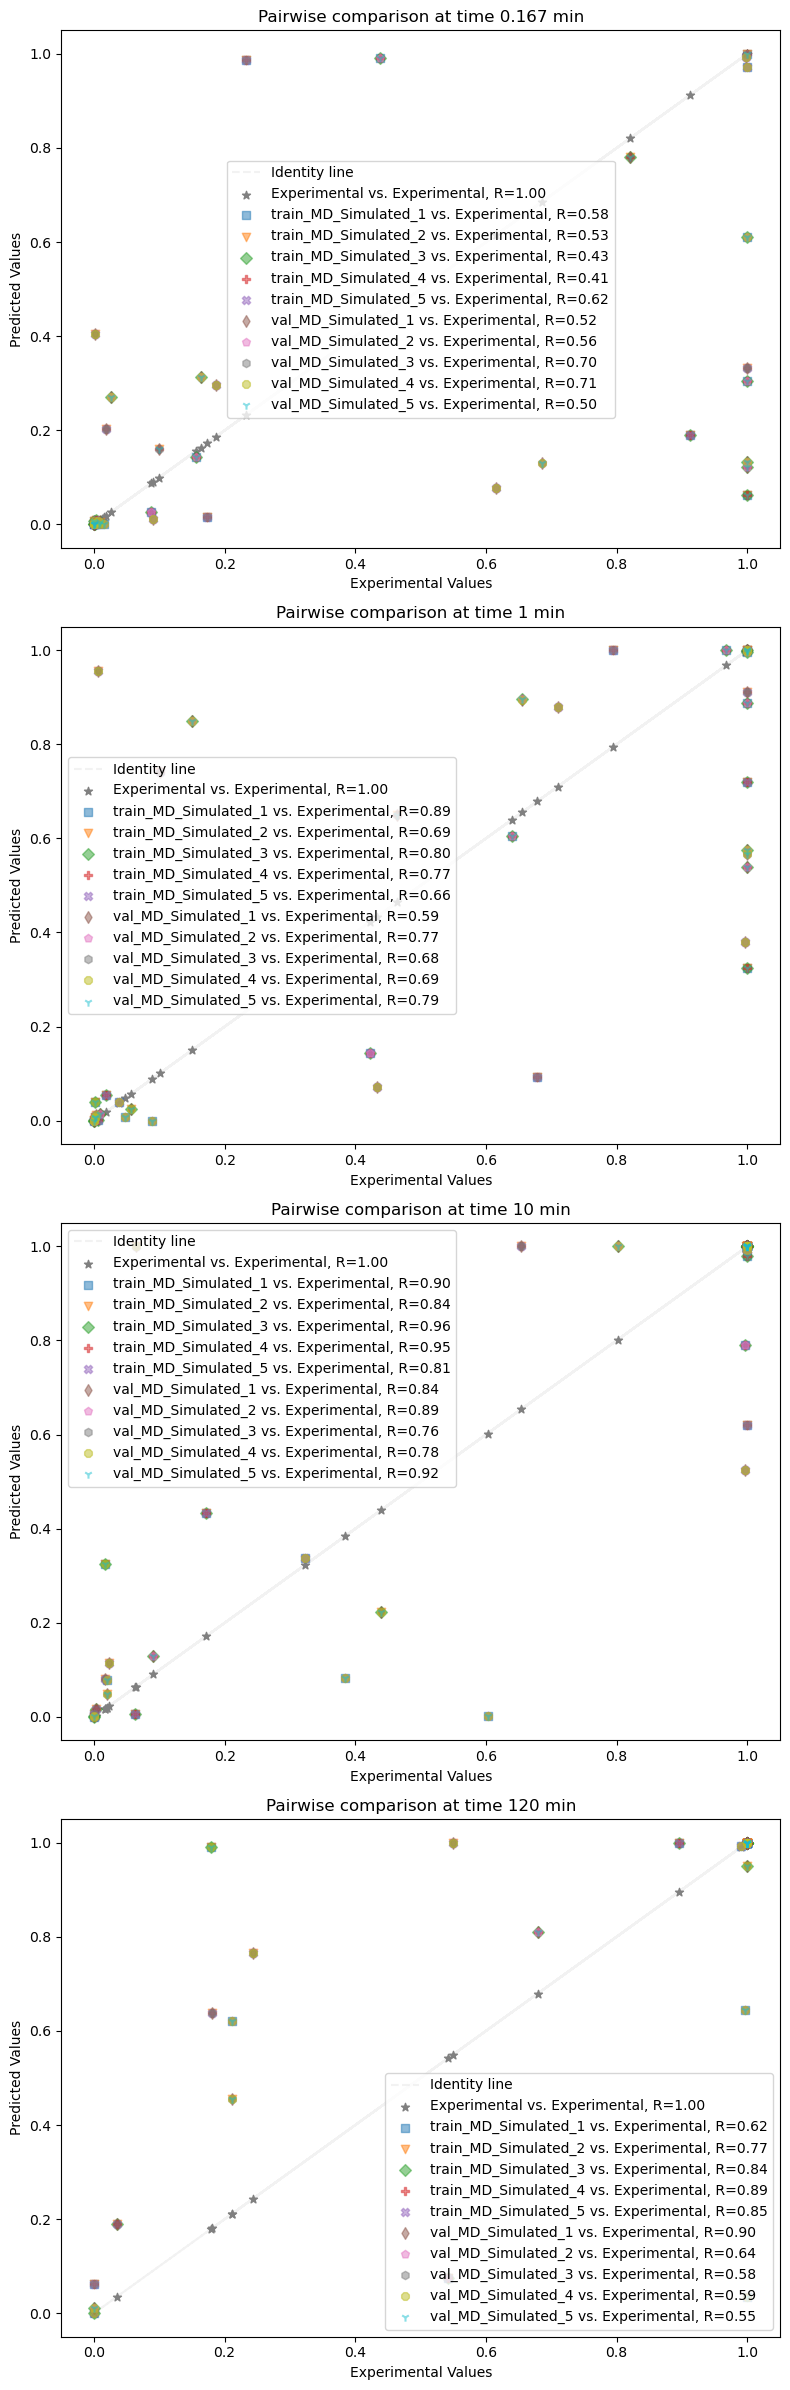

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12154  0.53974  0.99957  1.00000       33  val_MD_Simulated_5
242  0.30556  0.88736  1.00000  1.00000       34  val_MD_Simulated_5
243  0.00144  0.00859  0.08267  0.64493       35  val_MD_Simulated_5
244  0.00419  0.02484  0.22240  0.95113       36  val_MD_Simulated_5
245  0.16087  0.65015  0.99997  1.00000       38  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1183: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1202: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"Time": t, "Type": "Train", "R": train

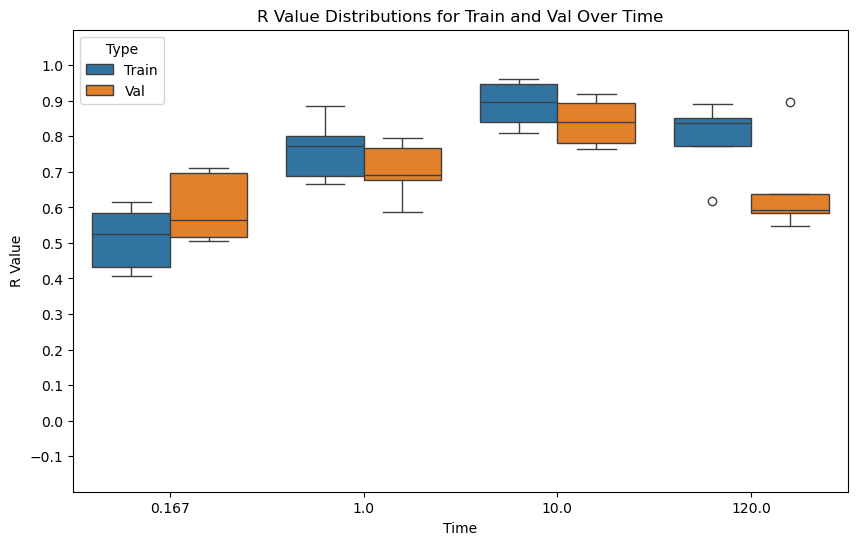

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00643  0.07447       24  train_MD_Simulated_1
1    0.00009  0.00054  0.00537  0.06260       13  train_MD_Simulated_1
2    0.00657  0.03868  0.32598  0.99121        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00286  0.03378       25  train_MD_Simulated_1
4    0.97171  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
405  0.12154  0.53974  0.99957  1.00000       33    val_MD_Simulated_5
406  0.30556  0.88736  1.00000  1.00000       34    val_MD_Simulated_5
407  0.00144  0.00859  0.08267  0.64493       35    val_MD_Simulated_5
408  0.00419  0.02484  0.22240  0.95113       36    val_MD_Simulated_5
409  0.16087  0.65015  0.99997  1.00000       38    val_MD_Simulated_5

[410 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.0064

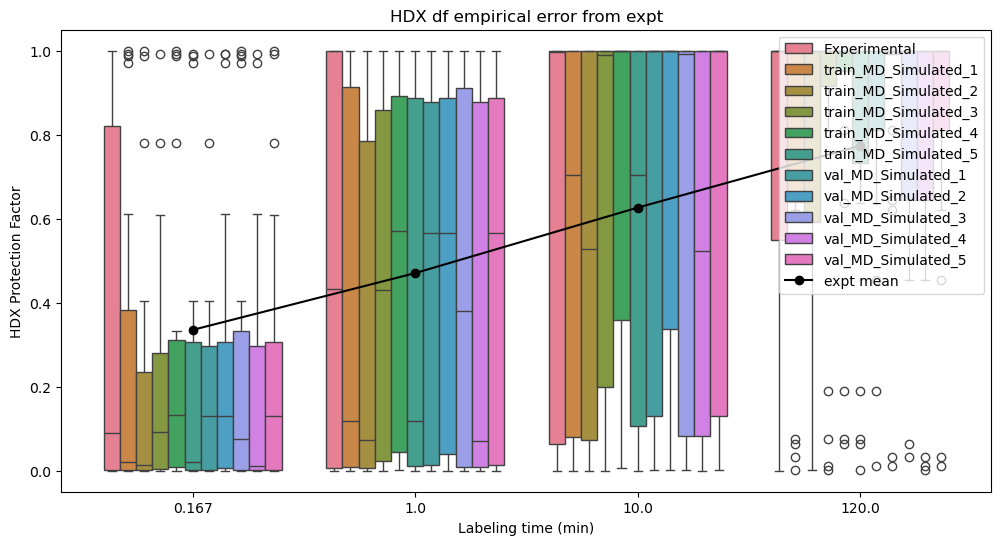

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00643  0.07447       24  train_MD_Simulated_1
1    0.00009  0.00054  0.00537  0.06260       13  train_MD_Simulated_1
2    0.00657  0.03868  0.32598  0.99121        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00286  0.03378       25  train_MD_Simulated_1
4    0.97171  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904       36          Experimental
447  0.01757  0.10068  0.65396  1.00000       37          Experimental
448  0.09888  0.46390  0.99804  1.00000       38          Experimental
449  0.00650  0.03831  0.32339  0.99079       39          Experimental
450  0.17259  0.67841  0.99999  1.00000       40          Experimental

[451 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

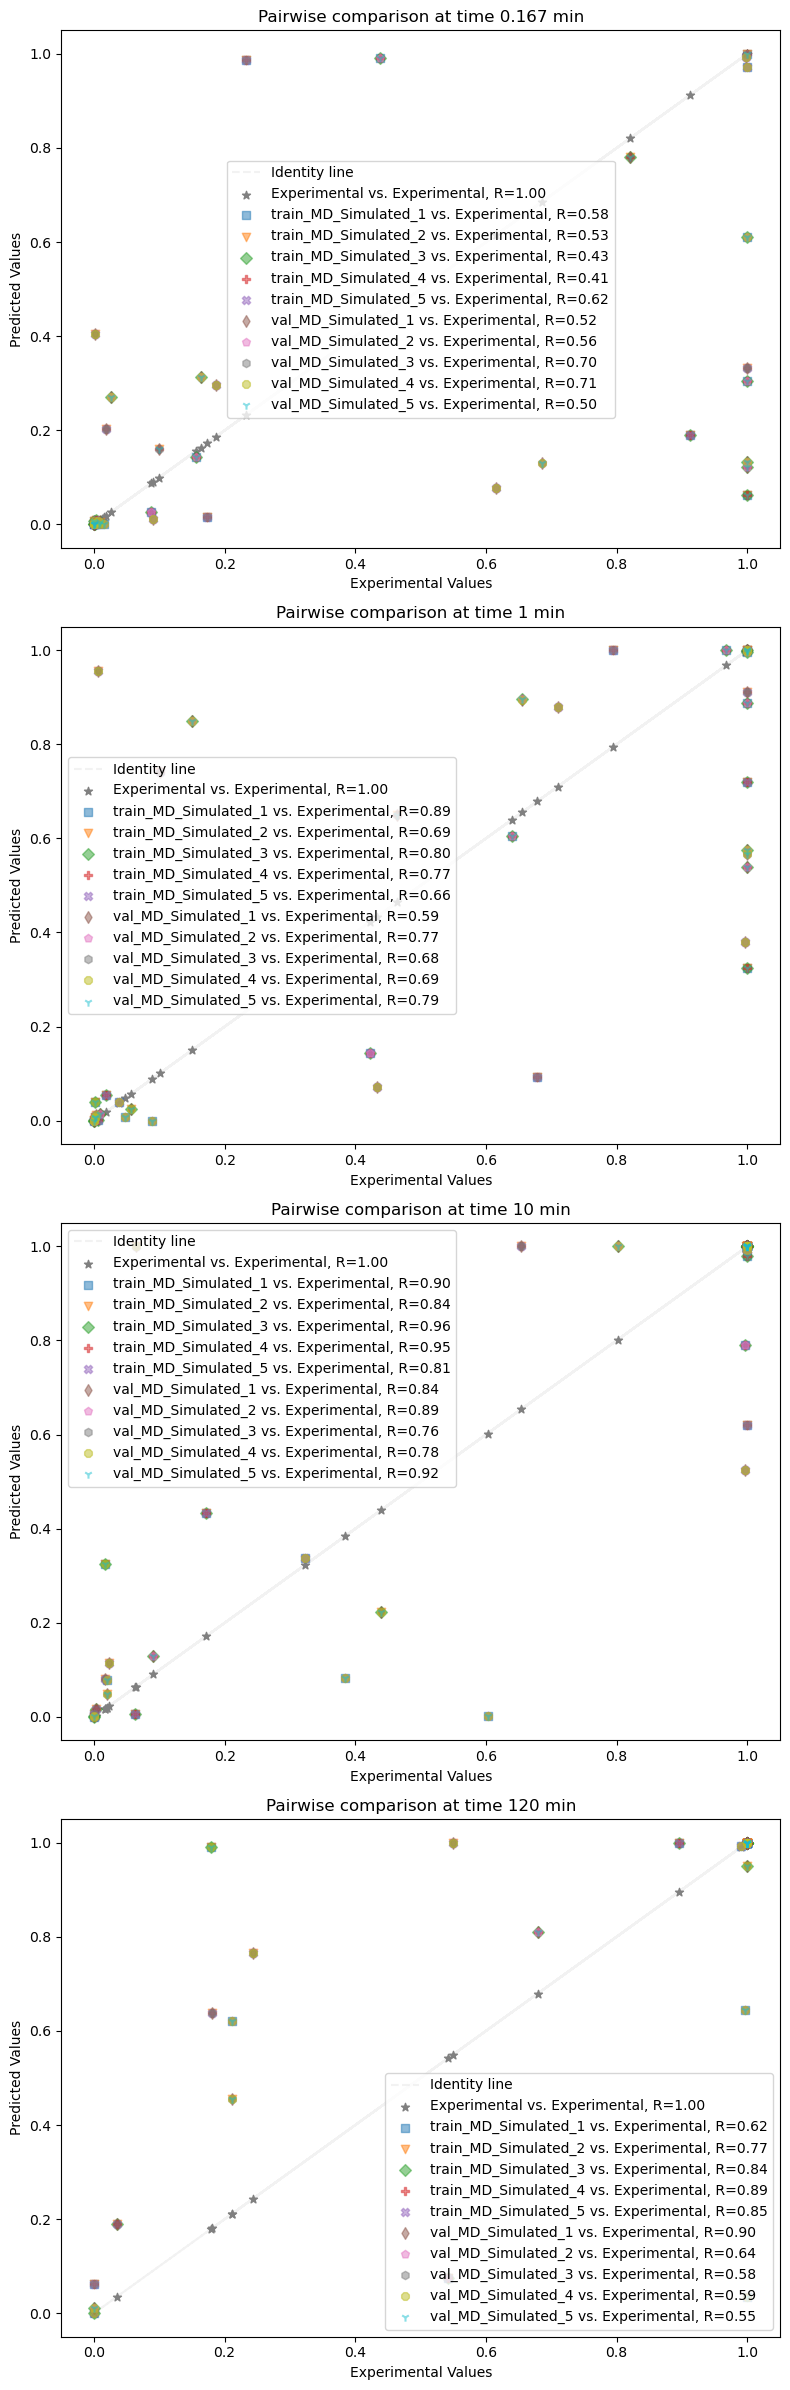

Train coverage: 97.56
Val coverage: 92.68
plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
215  0.98783  1.00000  1.00000    1.0        6  val_MD_Simulated_avg
216  0.99121  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
217  0.99304  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
218  0.99305  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
219  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[220 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.

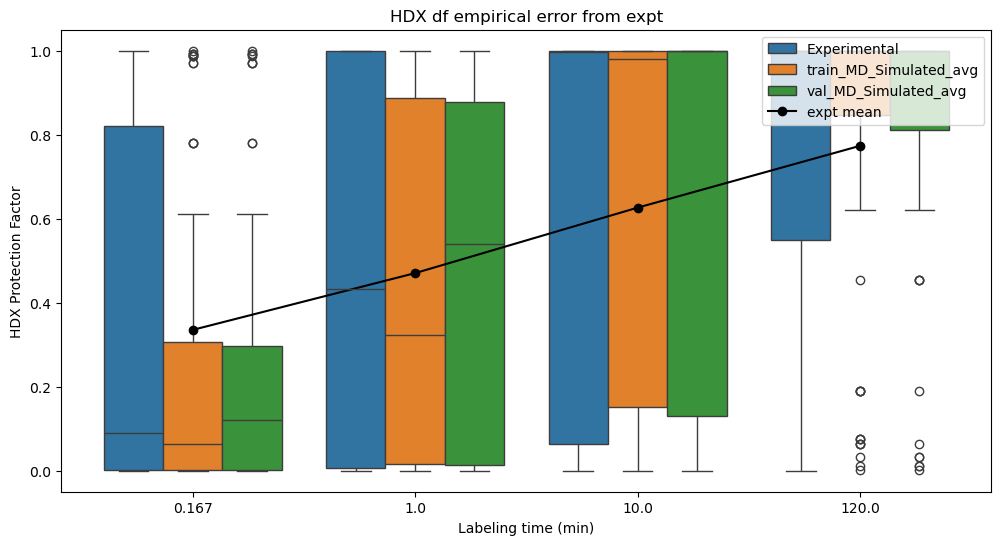

plotting paired errors
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
215  0.98783  1.00000  1.00000    1.0        6  val_MD_Simulated_avg
216  0.99121  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
217  0.99304  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
218  0.99305  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
219  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[220 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

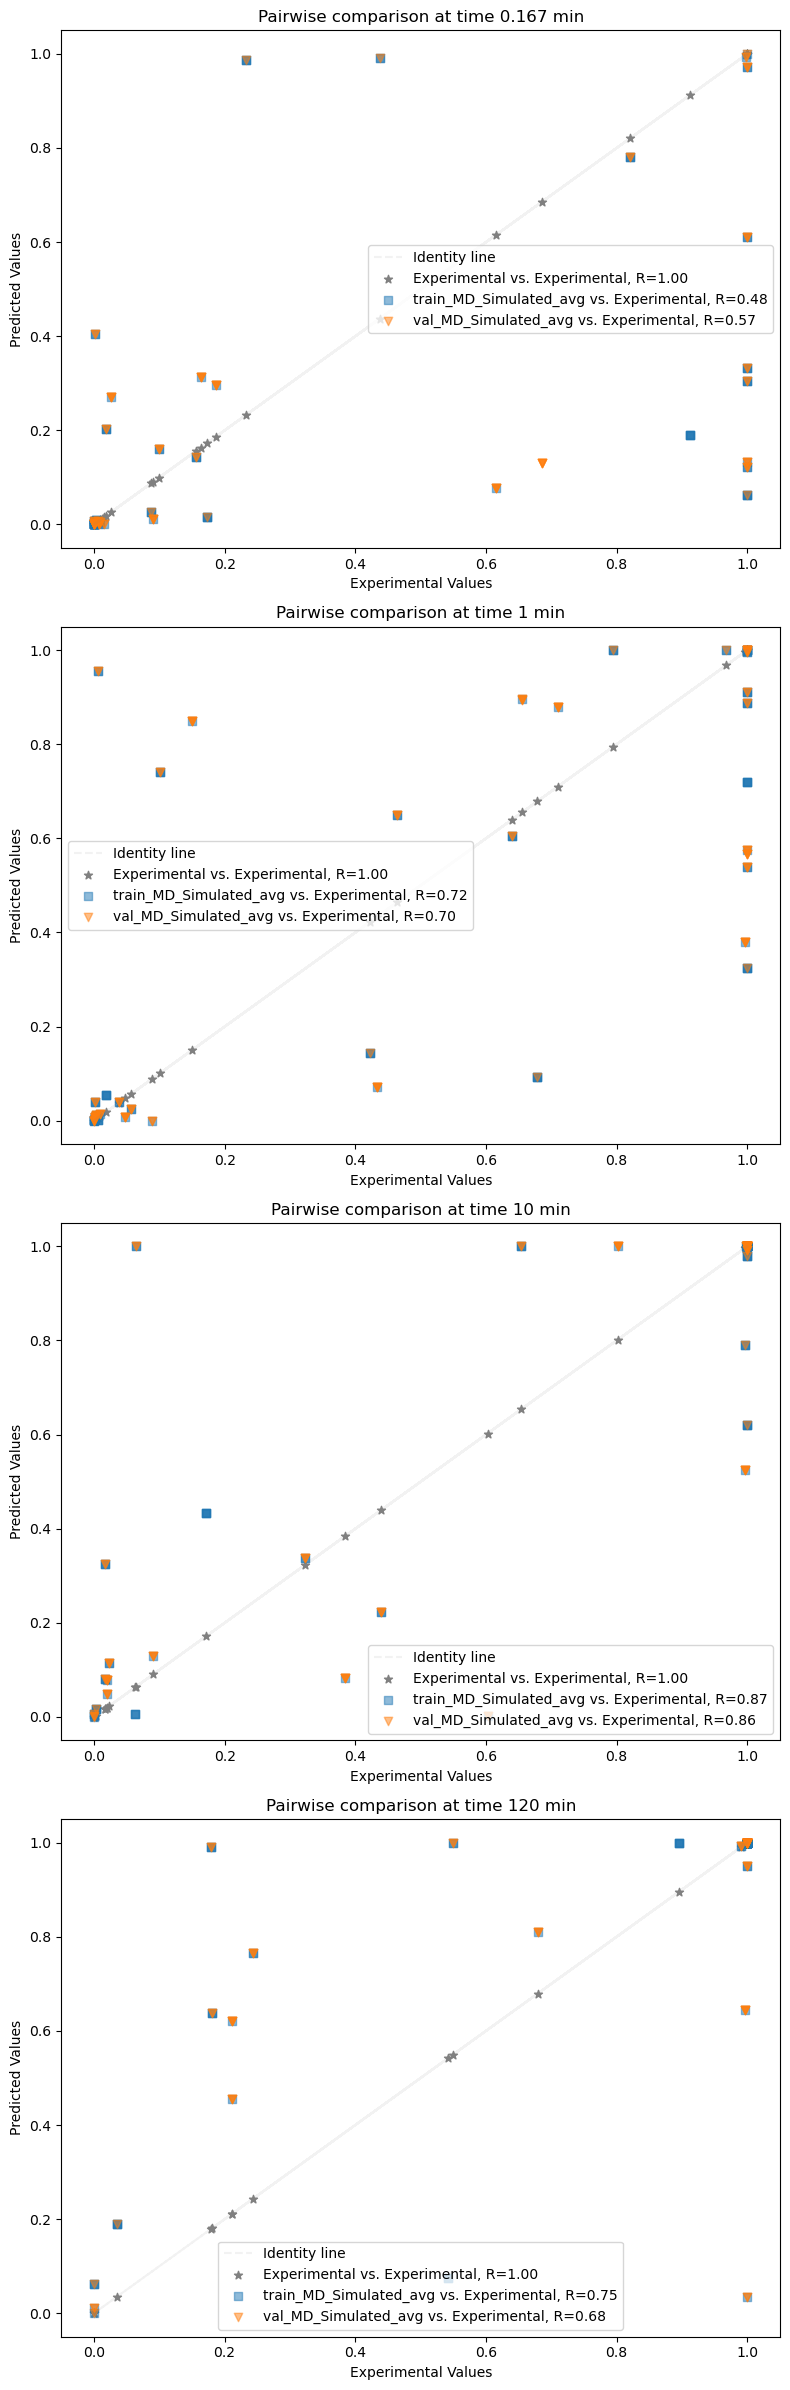

In [17]:
# with open('test_dump_full.pickle', 'rb') as f:
#     dump = pickle.load(f)

# train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )

In [19]:
import pandas as pd

In [20]:
file_name = "covid_submissions_all_info.csv"

In [22]:
sub_test = pd.read_csv(file_name)

/var/folders/4c/64jkr7n54w1558kqk0ks5rgr0000gn/T/ipykernel_28142/676304476.py:1: DtypeWarning: Columns (3,6,7,9,10,11,12,13,14,15,18,19,27,28,29,30,31,32,33,34,35,36,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,66,67,69,70,71,72,73,74,75,76,84,85,86,87,89,90,91,92,93,94,95,96,104,105,106,107,109,110,111,112,113,114,115,116,124,125,126,127,129,130,131,132,133,134,135,136,144,145,146,147,149,150,151,152,153,154,155,156,164,165,166,167,169,170,171,172,173,174,175,176,184,185,186,187,189,190,191,192,193,194,195,196,204,205,206,207,209,210,211,212,213,214,215,216,224,225,226,227,229,230,231,232,233,234,235,236,244,245,246,247,249,253,254,255,256,257,258,259,275,276) have mixed types. Specify dtype option on import or set low_memory=False.
  sub_test = pd.read_csv(file_name)


In [26]:
sub_test.columns.to_list()

['SMILES',
 'CID',
 'CID (canonical)',
 'CID (old format)',
 'Postera Link',
 'InChIKey',
 'creator',
 'rationale',
 'Submission Notes',
 'fragments',
 'Structure ID',
 'Fragalysis Link',
 'Enamine - REAL Space',
 'Enamine - Extended REAL Space',
 'Enamine - SCR',
 'Enamine - BB',
 'Mcule',
 'Mcule Ultimate',
 'In Molport or Mcule',
 'In eMolecules',
 'MW',
 'cLogP',
 'TPSA',
 'Rotatable Bonds',
 'Fraction sp3',
 'HBA',
 'HBD',
 'Covalent Fragment',
 'covalent_warhead',
 'Acrylamide',
 'Acrylamide Adduct',
 'Chloroacetamide',
 'Chloroacetamide Adduct',
 'Vinylsulfonamide',
 'Vinylsulfonamide Adduct',
 'Nitrile',
 'Nitrile Adduct',
 'series',
 'Order Date',
 'Maker',
 'Shipment Date',
 'inspired_by',
 'CDD_name',
 'CDD_mol_ID',
 'r_curve_IC50_x',
 'r_max_inhibition_reading_x',
 'r_min_inhibition_reading_x',
 'r_hill_slope_x',
 'r_R2_x',
 'r_concentration_uM_x',
 'r_inhibition_list_x',
 'f_curve_IC50_x',
 'f_max_inhibition_reading_x',
 'f_min_inhibition_reading_x',
 'f_hill_slope_x',
 'f